#**AML Assignment 2**

#Name: **Satish Kumar Sharma**

#BITS ID: **2022MT93327**

#Course Name: **Applied Machine Learning**

#Cource Id: **SEZG568**

Note: I have used google drive for the data upload and imported from my google drive folder.


**Dataset: Fire_alarm.csv**

Dataset consists of 62630 rows and 16 attributes . Build any 2 classification models to predict smoke. The last column, “Fire alarm” is the label.

The final deliverables of the Programming Assignment-II are:Python code in ipynb format with documenting all the findings of every stage

Save in a folder, zip and upload.

**Tools and Techniques**

Python libraries for data analysis.(NumPy,SciPy,Matplotlib,Pandas,ScikitLearn,Statsmodels,Seaborn,Bokeh,Blaze,Scrapy,Requests,BeautifulSoup)


**Programming Assignment -II Guidelines**

These are the guidelines and questions that you are expected to answer. The student will have to analyze the data that he/she has been given and come up with meaningful insights for the given dataset. The steps that have to be taken are explained below.

#**Steps** : I have followed below listed steps.

1. About this Dataset

2. Load Libraries

3. Descriptive Statistics : Load And Explore Data(EDA)

4. Performing Train Test Split

5. Balance the dataset if required : Data Preprocessing with Standard Scaler

6. Classification Model: Model Building

7. Evaluating the model : Further Performance Analysis
      7.1.Confusion Matrix

      7.2.Precision , Recall & F1-score

8. Predictions with respect to new dataset

9. Performance comparison and Conclusion

#**1. About given Dataset**

Target Variable : **Fire Alarm**

Feature Description

1- UTC : The time when experiment was performed.

2- Temperature : Temperature of Surroundings. Measured in Celsius

3- Humidity : The air humidity during the experiment.

4- TVOC : Total Volatile Organic Compounds. Measured in ppb (parts per billion)

5- eCo2 : CO2 equivalent concentration. Measured in ppm (parts per million)

6- Raw H2 : The amount of Raw Hydrogen present in the surroundings.

7- Raw Ethanol : The amount of Raw Ethanol present in the surroundings.

8- Pressure : Air pressure. Measured in hPa

9- PM1.0 : Paticulate matter of diameter less than 1.0 micrometer .

10- PM2.5 : Paticulate matter of diameter less than 2.5 micrometer.

11- NC0.5 : Concentration of particulate matter of diameter less than 0.5 micrometers.

12- NC1.0 : Concentration of particulate matter of diameter less than 1.0 micrometers.

13- NC2.5 : Concentration of particulate matter of diameter less than 2.5 micrometers.

14- CNT : Simple Count.

15- Fire Alarm : (Reality) If fire was present then value is 1 else it is 0.


#**2. Load Libraries : Import all the Required Libraries**

In [ ]:
#Import all the Libraries:Load Libraries**
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px


##### Scikit Learn modules needed for Logistic Regression
from sklearn.linear_model import LogisticRegression,Lasso,LassoCV,Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder,MinMaxScaler , StandardScaler

## Below packages are needed for Hyper Parameter Tuning of an Algorithm in Scikit Learn
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


#**3. Descriptive Statistics : Load And Explore Data(EDA)**


# Data Import

In [ ]:
# Load and Read the dataset
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#Importing data from my google drive folder.
df = pd.read_csv("/content/drive/MyDrive/satish/Fire_alarm.csv")
df.head(2)

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB
None


In [ ]:
print(df.isna().sum())

Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64


In [ ]:
df['Fire Alarm'].value_counts()

1    44757
0    17873
Name: Fire Alarm, dtype: int64

<Axes: >

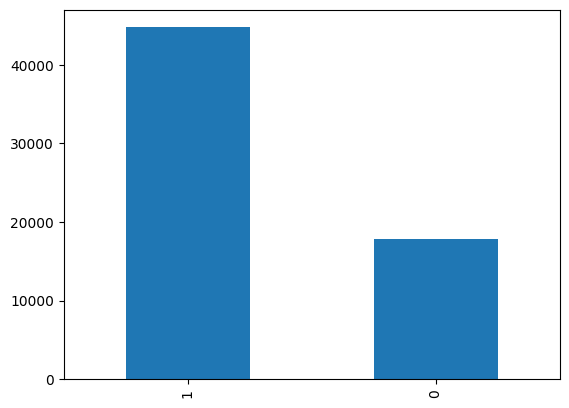

In [ ]:
df['Fire Alarm'].value_counts().plot(kind='bar')

            Fire Alarm : (Reality) If fire was present then value is 1 else it is 0.

<Axes: ylabel='Fire Alarm'>

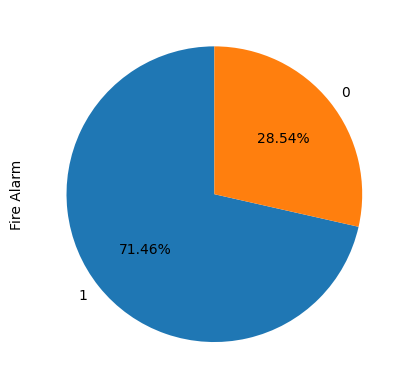

In [ ]:
df['Fire Alarm'].value_counts().plot(kind='pie',autopct='%1.2f%%',startangle=90,)


In [ ]:
df1=df.copy()

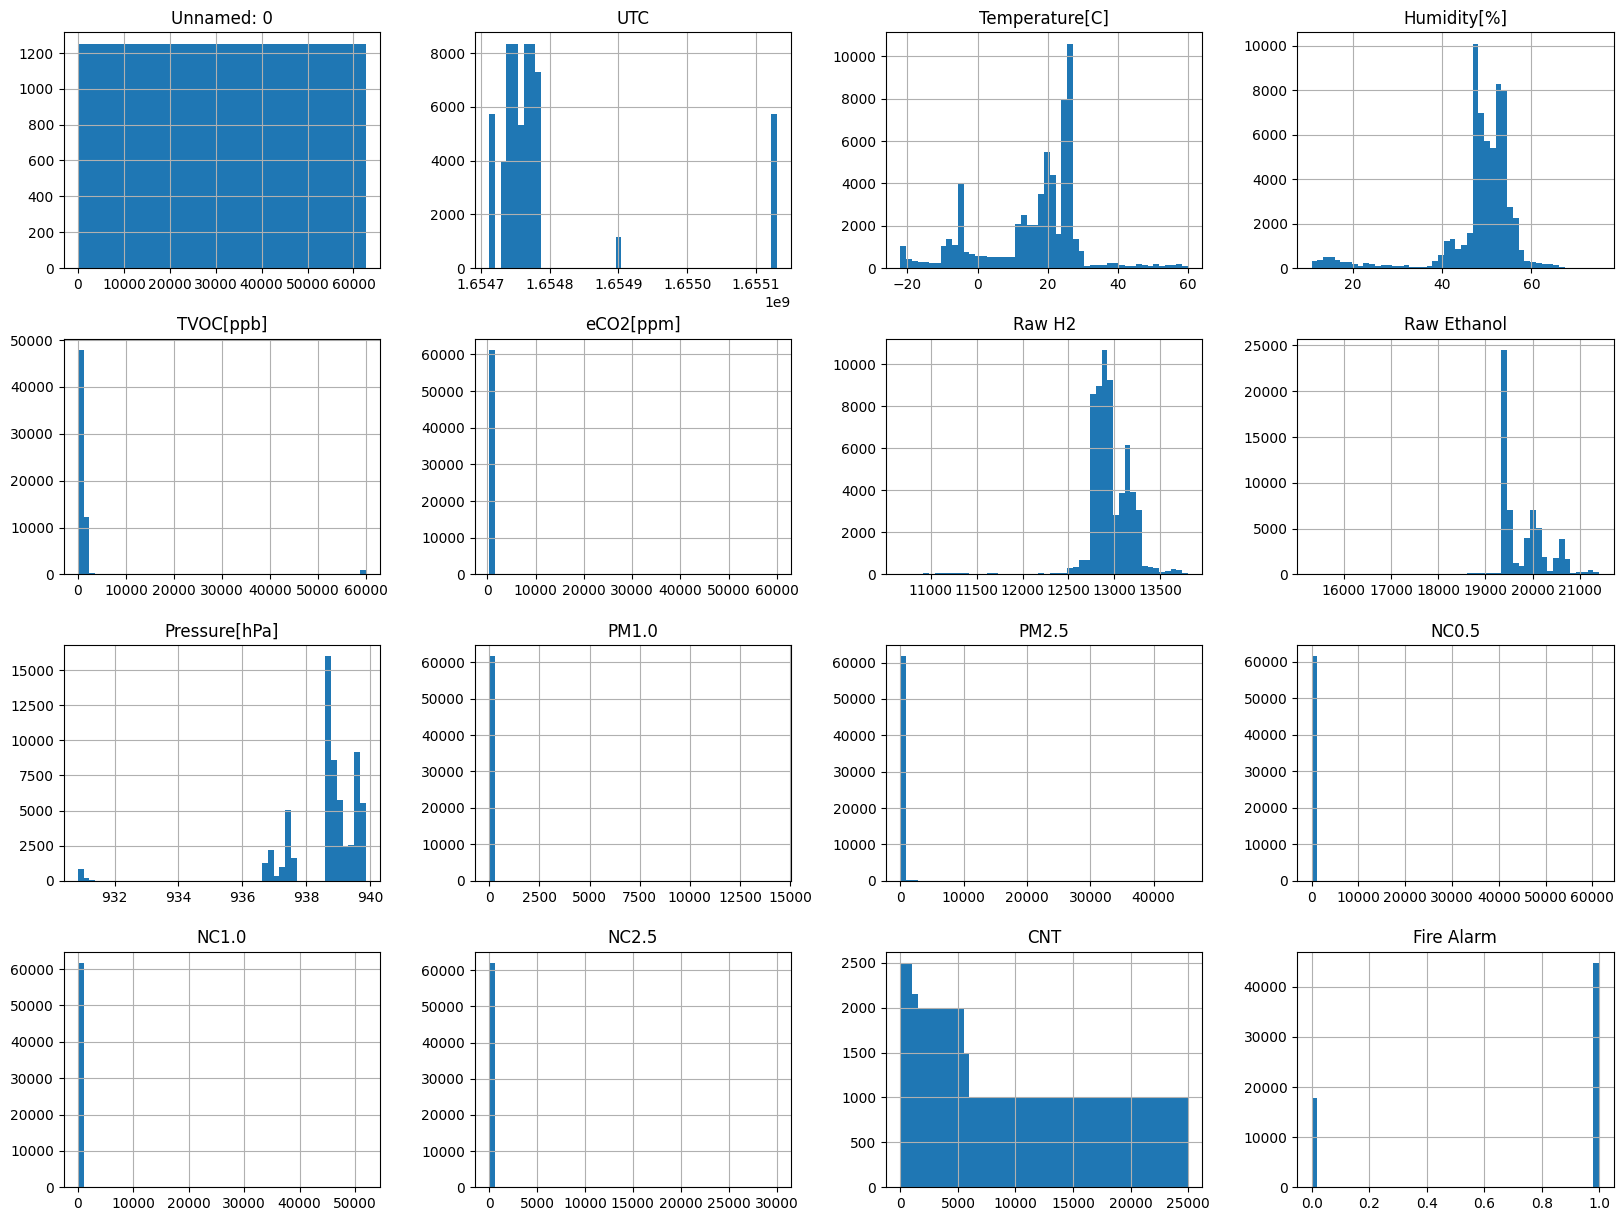

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
# x-axis is column Values and Y-axis is Total Counts
plt.show()

Conclusion

We can see some binary and continous values in different histograms and there behaviour


In [ ]:
print(df.describe())

         Unnamed: 0           UTC  Temperature[C]   Humidity[%]     TVOC[ppb]  \
count  62630.000000  6.263000e+04    62630.000000  62630.000000  62630.000000   
mean   31314.500000  1.654792e+09       15.970424     48.539499   1942.057528   
std    18079.868017  1.100025e+05       14.359576      8.865367   7811.589055   
min        0.000000  1.654712e+09      -22.010000     10.740000      0.000000   
25%    15657.250000  1.654743e+09       10.994250     47.530000    130.000000   
50%    31314.500000  1.654762e+09       20.130000     50.150000    981.000000   
75%    46971.750000  1.654778e+09       25.409500     53.240000   1189.000000   
max    62629.000000  1.655130e+09       59.930000     75.200000  60000.000000   

          eCO2[ppm]        Raw H2   Raw Ethanol  Pressure[hPa]         PM1.0  \
count  62630.000000  62630.000000  62630.000000   62630.000000  62630.000000   
mean     670.021044  12942.453936  19754.257912     938.627649    100.594309   
std     1905.885439    272.464

Check all the basic statistics e.g. mean, median, std etc. We found there is lot of variance in the Data Min and Max value so we have to use Normalization the Data Further We can also see there no null values present in each column.

#**4. Data Visualization: Performing Train Test Split**




In [ ]:
features = df.drop("Fire Alarm", axis =1) # droping Traget variable
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,df["Fire Alarm"],test_size=0.20,random_state=10)
print(f"x_train data is {x_train.shape}")
print(f"y_train data is {y_train.shape}")
print(f"x_test data is {x_test.shape}")
print(f"y_test data is {y_test.shape}")

x_train data is (50104, 15)
y_train data is (50104,)
x_test data is (12526, 15)
y_test data is (12526,)


**Creating copy of X_train**



In [ ]:
df_train_copy = x_train.copy()

<Axes: >

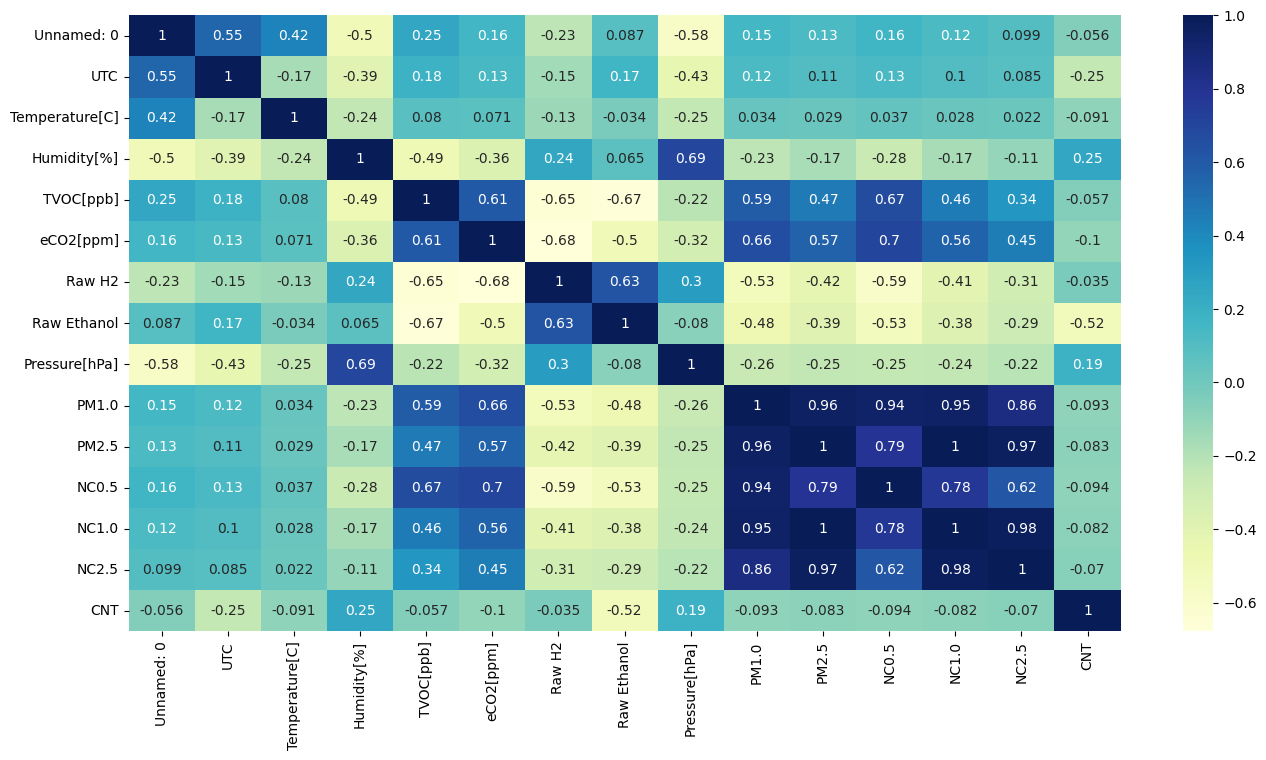

In [ ]:
# Explore data visually
# Build Correlation Matrix to
correlation = df_train_copy.corr()
#print(correlation)

fig , ax = plt.subplots()
fig.set_figwidth(16)
fig.set_figheight(8)
sns.heatmap(correlation,annot=True,cmap="YlGnBu")

Conclusion

We can see there is very high correlation between PMs and NCs Data. Also we can find some unwanted columns, like Unnamed, UTC and CNT, those columns has nothing to do with data. Therefore going further we will drop the unwanted columns and columns with high correlations.

# **5. Balance the dataset if required: Data Preprocessing**

Removing columns with unwanted values and Very High Corellation



In [ ]:
x_train = x_train.drop(['Unnamed: 0', 'UTC', 'CNT',"PM1.0", "PM2.5", "NC2.5"], axis=1)
x_test = x_test.drop(['Unnamed: 0', 'UTC', 'CNT',"PM1.0", "PM2.5", "NC2.5"], axis=1)


In [ ]:
x_train.describe()
x_train.columns

Index(['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2',
       'Raw Ethanol', 'Pressure[hPa]', 'NC0.5', 'NC1.0'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
model = scaler.fit(x_train)
scaled_data = model.transform(x_train)
x_train_tr = pd.DataFrame(scaled_data)
x_train_tr.columns = ['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2',
       'Raw Ethanol', 'Pressure[hPa]', 'NC0.5', 'NC1.0']
x_train_tr.describe()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],NC0.5,NC1.0
count,5.010400e+04,5.010400e+04,5.010400e+04,5.010400e+04,5.010400e+04,5.010400e+04,5.010400e+04,5.010400e+04,5.010400e+04
mean,8.374092e-17,2.158403e-16,1.375592e-17,-1.340138e-17,-6.169245e-16,-2.858040e-15,3.548459e-14,2.127204e-18,8.154281e-18
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,-2.641423e+00,-4.281348e+00,-2.485160e-01,-1.402998e-01,-8.403246e+00,-7.300395e+00,-5.887417e+00,-1.145881e-01,-9.076504e-02
25%,-3.457470e-01,-1.158733e-01,-2.319224e-01,-1.402998e-01,-4.176773e-01,-5.272137e-01,5.215788e-02,-1.124939e-01,-9.015125e-02
50%,2.905531e-01,1.807710e-01,-1.221991e-01,-1.402998e-01,-7.047871e-02,-4.186586e-01,1.407066e-01,-1.116463e-01,-8.990538e-02
75%,6.583905e-01,5.306301e-01,-9.557219e-02,-1.201050e-01,6.128378e-01,5.307875e-01,5.940457e-01,-1.111836e-01,-8.977051e-02
max,3.063781e+00,3.017007e+00,7.469421e+00,3.153365e+01,3.176198e+00,2.721216e+00,9.308336e-01,1.440121e+01,2.286658e+01


#5.1 Performing Standard Scalling on Test set

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
model = scaler.fit(x_test)
scaled_data = model.transform(x_test)
x_test_tr = pd.DataFrame(scaled_data)
x_test_tr.columns = ['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2',
       'Raw Ethanol', 'Pressure[hPa]', 'NC0.5', 'NC1.0']
x_test_tr.describe()


,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],NC0.5,NC1.0
count,1.252600e+04,1.252600e+04,1.252600e+04,1.252600e+04,1.252600e+04,1.252600e+04,1.252600e+04,1.252600e+04,1.252600e+04
mean,2.076151e-16,4.713883e-16,-1.134509e-17,-1.928665e-17,7.323253e-16,1.109549e-15,-4.429972e-14,-5.672543e-18,-5.672543e-19
std,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00
min,-2.659443e+00,-4.189821e+00,-2.490576e-01,-1.470891e-01,-8.136270e+00,-7.200485e+00,-5.663072e+00,-1.176935e-01,-9.761203e-02
25%,-3.491881e-01,-1.049146e-01,-2.325990e-01,-1.470891e-01,-3.901512e-01,-5.119713e-01,6.280846e-02,-1.157249e-01,-9.693976e-02
50%,2.839896e-01,1.840856e-01,-1.263089e-01,-1.470891e-01,-5.710037e-02,-4.014979e-01,1.445234e-01,-1.148672e-01,-9.665338e-02
75%,6.507294e-01,5.317194e-01,-9.942232e-02,-1.282098e-01,6.018390e-01,5.310275e-01,5.893954e-01,-1.144064e-01,-9.649773e-02
max,3.051981e+00,2.956264e+00,7.289243e+00,2.965955e+01,3.083605e+00,2.685259e+00,9.098710e-01,1.389438e+01,2.526527e+01


#**6. Classification Model: Model Building**

Build different Classification models and checking the performance for each.

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_tr, y_train)
lr_accuracy = lr.score(x_test_tr, y_test)
print(f"Accuracy of Logistic Regression Model ---> {lr_accuracy}")
lr_predict = lr.predict(x_test_tr)

Accuracy of Logistic Regression Model ---> 0.8951780296982277


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train_tr, y_train)
dt_accuracy = dt.score(x_test_tr, y_test)
print(f"Accuracy of Decision Tree Model ---> {dt_accuracy}")
dt_predict = dt.predict(x_test_tr)


Accuracy of Decision Tree Model ---> 0.9330193198147853


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train_tr, y_train)
rf_accuracy = rf.score(x_test_tr, y_test)
print(f"Accuracy of Random Forest Model ---> {rf_accuracy}")
rf_predict = rf.predict(x_test_tr)

Accuracy of Random Forest Model ---> 0.9615200383202938


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(x_train_tr, y_train)
ada_accuracy = model.score(x_test_tr, y_test)
print(f"Accuracy of AdaBoost Model ---> {ada_accuracy}")
ada_predict = model.predict(x_test_tr)

Accuracy of AdaBoost Model ---> 0.9314226409069136


Conclusion

Accuracy of Logistic Regression Model ---> 0.89517

Accuracy of Decision Tree Model ---> 0.93309

Accuracy of Random Forest Model ---> 0.964394

Accuracy of AdaBoost Model ---> 0.93142

We can see that Random forest performs the best which is close to 97%, as compare to other classsfication models.

Now lets check the performance measure for all these models using some other techniques for better score accuracy.

#**7. Evaluating the model: Further Performance Analysis**

#7.1 Confusion Matrix

In [ ]:
lr_cnf_matrix = confusion_matrix(y_test, lr_predict)
dt_cnf_matrix = confusion_matrix(y_test, dt_predict)
rf_cnf_matrix = confusion_matrix(y_test, rf_predict)
ada_cnf_matrix = confusion_matrix(y_test, ada_predict)
print(f"CM for LR ---> {lr_cnf_matrix}")
print(f"CM for LR ---> {dt_cnf_matrix}")
print(f"CM for LR ---> {rf_cnf_matrix}")
print(f"CM for LR ---> {ada_cnf_matrix}")

CM for LR ---> [[2743  848]
 [ 465 8470]]
CM for LR ---> [[3591    0]
 [ 839 8096]]
CM for LR ---> [[3591    0]
 [ 482 8453]]
CM for LR ---> [[3583    8]
 [ 851 8084]]


CM for Logistic Regression
Confusion matrix, without normalization
[[2743  848]
 [ 465 8470]]
Normalized confusion matrix
[[0.76385408 0.23614592]
 [0.05204253 0.94795747]]


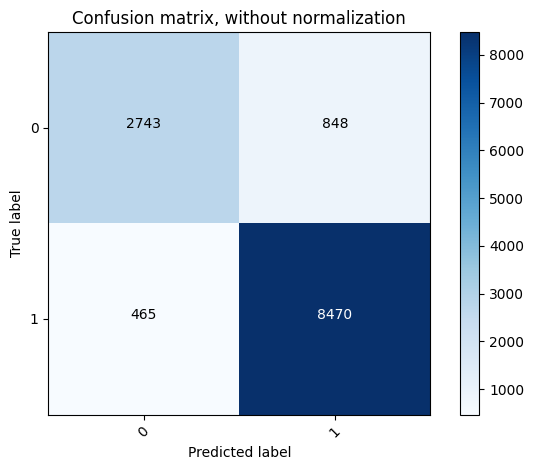

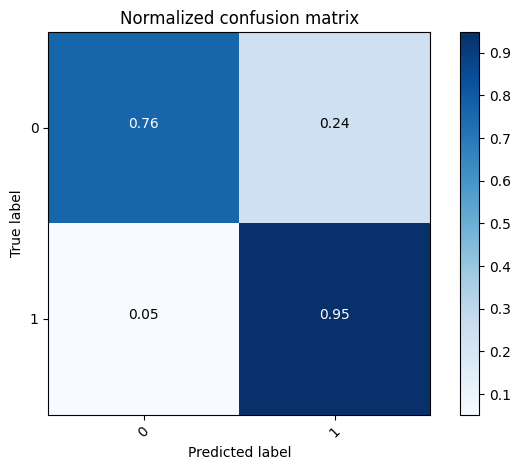

In [ ]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


 #Without Normalization
print("CM for Logistic Regression")
plt.figure()
plot_confusion_matrix(lr_cnf_matrix, classes= [0,1],
                      title='Confusion matrix, without normalization')
# With normalization
plt.figure()
plot_confusion_matrix(lr_cnf_matrix, classes= [0,1], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Confusion matrix for Decision Tree
Confusion matrix, without normalization
[[3591    0]
 [ 839 8096]]
Normalized confusion matrix
[[1.         0.        ]
 [0.09390039 0.90609961]]


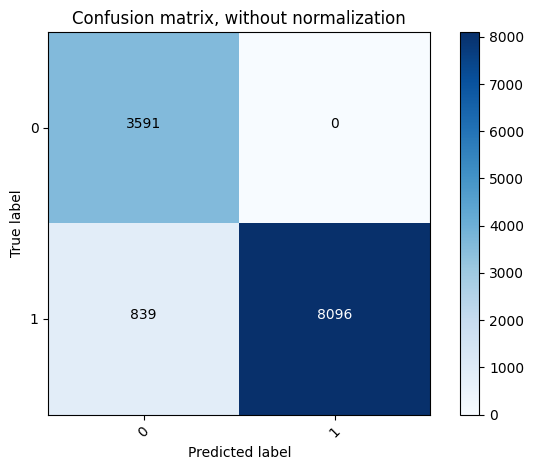

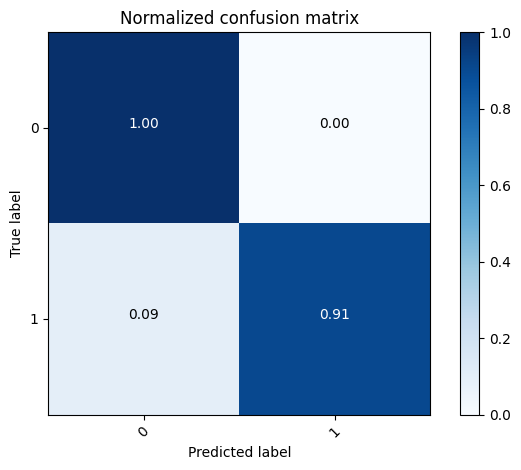

In [ ]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")


    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

     #Without Normalization
print("Confusion matrix for Decision Tree")
plt.figure()
plot_confusion_matrix(dt_cnf_matrix, classes= [0,1],
                      title='Confusion matrix, without normalization')
# With normalization
plt.figure()
plot_confusion_matrix(dt_cnf_matrix, classes= [0,1], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

**Confusion Matrix For Random Forest**

CM for Random Forest
Confusion matrix, without normalization
[[3591    0]
 [ 482 8453]]
Normalized confusion matrix
[[1.         0.        ]
 [0.05394516 0.94605484]]


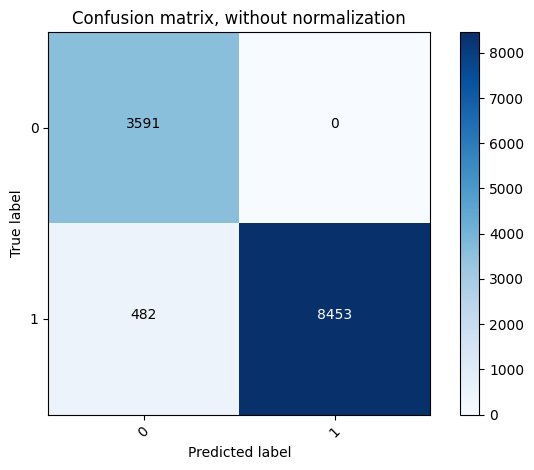

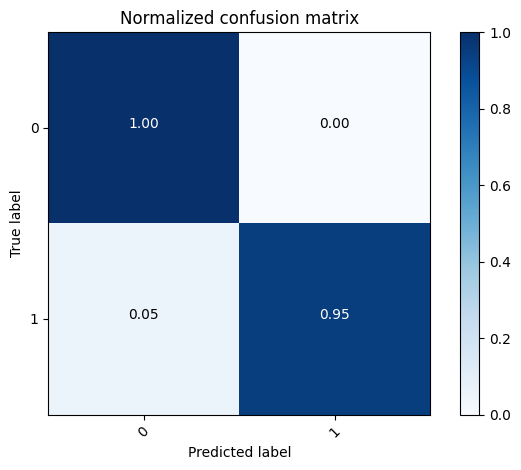

In [ ]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


    #Without Normalization
print("CM for Random Forest")
plt.figure()
plot_confusion_matrix(rf_cnf_matrix, classes= [0,1],
                      title='Confusion matrix, without normalization')

# With normalization
plt.figure()
plot_confusion_matrix(rf_cnf_matrix, classes= [0,1], normalize=True,
                      title='Normalized confusion matrix')

plt.show()



**Confusion Matrix for Ada Boost**

CM for Ada Boost
Confusion matrix, without normalization
[[3583    8]
 [ 851 8084]]
Normalized confusion matrix
[[0.99777221 0.00222779]
 [0.09524342 0.90475658]]


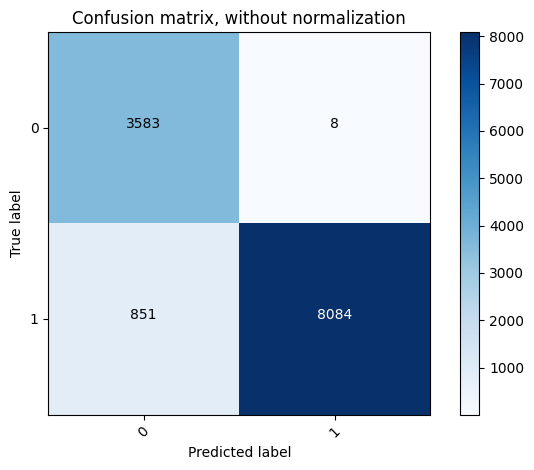

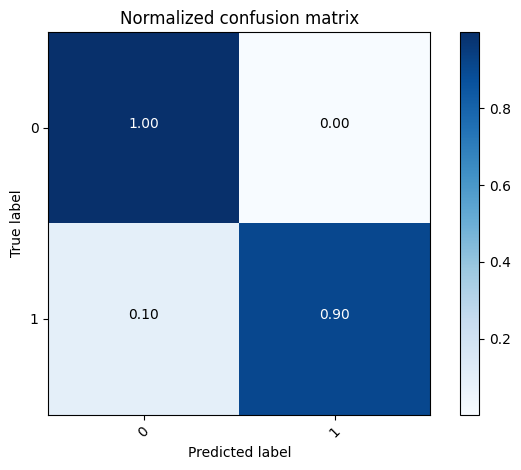

In [ ]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


    #Without Normalization
print("CM for Ada Boost")
plt.figure()
plot_confusion_matrix(ada_cnf_matrix, classes= [0,1],
                      title='Confusion matrix, without normalization')

# With normalization
plt.figure()
plot_confusion_matrix(ada_cnf_matrix, classes= [0,1], normalize=True,
                      title='Normalized confusion matrix')

plt.show()



**CM for Random Forest --> 95%**

#7.2.Precision , Recall & F1-score

Precision can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes

Recall identifies the proportion of correctly predicted actual positives.

f1-score is the weighted harmonic mean of precision and recall. The best possible f1-score would be 1.0 and the worst would be 0.0. f1-score is the harmonic mean of precision and recall.

Support is the actual number of occurrences of the class in our dataset.


In [ ]:
from sklearn.metrics import precision_score
lr_precision = precision_score(y_test, lr_predict)
dt_precision = precision_score(y_test, dt_predict)
rf_precision = precision_score(y_test, rf_predict)
ada_precision = precision_score(y_test, ada_predict)
# np.set_printoptions(precision=2)
print(f"Precision_Score for LR ---> {lr_precision}")
print(f"Precision_Score for DT --->{dt_precision}")
print(f"Precision_Score for RF --->{rf_precision}")
print(f"Precision_Score for ADA --->{ada_precision}")


Precision_Score for LR ---> 0.9089933462116334
Precision_Score for DT --->1.0
Precision_Score for RF --->1.0
Precision_Score for ADA --->0.9990113692535838


Conclusion Precision Score

As you can see that some classifiesr are giving teh accuracy of 1 i.e 100%, which is not quite possible.

So let's check the accuracy score futher using other metrics too.

In [ ]:
from sklearn.metrics import recall_score
lr_recall= recall_score(y_test, lr_predict)
dt_recall= recall_score(y_test, dt_predict)
rf_recall= recall_score(y_test, rf_predict)
ada_recall = recall_score(y_test, ada_predict)
# np.set_printoptions(precision=2)
print(f"Recall_score for LR ---> {lr_recall}")
print(f"Recall_score for DT --->{dt_recall}")
print(f"Recall_score for RF --->{rf_recall}")

Recall_score for LR ---> 0.9479574706211528
Recall_score for DT --->0.906099608282037
Recall_score for RF --->0.9460548405148294


**Conclusion Recall Score**

Here we have quite decent accuraccy and also we can notice Random forest is still performing the best till now.

**F1 Score**

In [ ]:
from sklearn.metrics import f1_score
lr_f1_score = f1_score(y_test, lr_predict)
dt_f1_score = f1_score(y_test, dt_predict)
rf_f1_score = f1_score(y_test, rf_predict)
ada_f1_score = f1_score(y_test, ada_predict)
# np.set_printoptions(precision=2)
print(f"F1 Score for LR ---> {lr_f1_score}")
print(f"F1 Score for DT --->{dt_f1_score}")
print(f"F1 Score for RF --->{rf_f1_score}")
print(f"F1 Score for ADA --->{ada_f1_score}")


F1 Score for LR ---> 0.9280666191858873
F1 Score for DT --->0.9507368915507016
F1 Score for RF --->0.9722797331492983
F1 Score for ADA --->0.9495507135725613


**Conclusion with F1 Score** :

Now we have the final Accuracy as F1 Score, which says that Random Forest is the model which is again Performing the best.

**FINAL CONCLUSION¶**

We have tested our Data using different Classification Models, and also check the accuracy score using various metrix methods.

We saw that in most of the metrix methods, Random Forest is the model which performes best on the given Data Set.

Hence we can conclude that Random Forest probably be the best model for this data as compare with another models.





#**8. Predictions with respect to new dataset**



**Predicting -New data set-1**

In [ ]:
#predictions with respect to new dataset
data_new={'Temperature[C]':0.253425, 'Humidity[%]': 0.653155, 'TVOC[ppb]':-0.247047, 'eCO2[ppm]':-0.147089, 'Raw H2':1.124693	,
       'Raw Ethanol':0.747100, 'Pressure[hPa]' :0.811375, 'NC0.5' :-0.114190, 'NC1.0' : -0.096425}
index=[1]#serial number
my_data=pd.DataFrame(data_new,index)
print(my_data)



   Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]    Raw H2  Raw Ethanol  \
1        0.253425     0.653155  -0.247047  -0.147089  1.124693       0.7471   

   Pressure[hPa]    NC0.5     NC1.0  
1       0.811375 -0.11419 -0.096425  


In [ ]:

my_data_fire=rf.predict(my_data)
fire = np.round(my_data_fire, 2)
print(f" The predicted fire label for the given data is :{fire}")



 The predicted fire label for the given data is :[0]




**Predicting -New data set-2**




In [ ]:
#predictions with respect to new dataset
data_new2={'Temperature[C]':0.171176, 'Humidity[%]': 0.735409, 'TVOC[ppb]': -0.211743, 'eCO2[ppm]':-0.147089, 'Raw H2': 0.634070	,
       'Raw Ethanol': 0.360444, 'Pressure[hPa]' : 0.611466, 'NC0.5' :-0.117189, 'NC1.0' :-0.097441}  #x_test_tr.iloc[3179]
index=[1]#serial number
my_data2=pd.DataFrame(data_new2,index)
print(my_data2)



   Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]   Raw H2  Raw Ethanol  \
1        0.171176     0.735409  -0.211743  -0.147089  0.63407     0.360444   

   Pressure[hPa]     NC0.5     NC1.0  
1       0.611466 -0.117189 -0.097441  


In [ ]:

my_data_fire2=rf.predict(my_data2)
fire2 = np.round(my_data_fire2, 2)
print(f" The predicted fire label for the given data is :{fire2}")


 The predicted fire label for the given data is :[1]


**Conclusion**

Here we have predicted Fire was present or not ,if present then value is 1 else it is 0, with new dataset , with model(Random forest) based on given dataset.

#**9. Performance comparison**

The reported accuracy values for the Decision Tree Model and Random Forest Model are as follows:

#**Inferences:**

**1. Higher Accuracy of Random Forest:**
The Random Forest Model demonstrates a higher accuracy (96.44%) compared to the Decision Tree Model (93.31%).

**2. Ensemble Advantage:** Random Forest is an ensemble model built on the foundation of decision trees. It leverages the power of multiple decision trees to improve overall predictive accuracy.
The ensemble nature of Random Forest helps reduce overfitting and provides more robust generalization to unseen data.

**3. Complexity and Overfitting:** Decision Trees can be prone to overfitting, capturing noise in the training data and leading to suboptimal performance on new data.
Random Forest mitigates overfitting by aggregating predictions from multiple trees, which helps achieve a more accurate and stable model.

**4. Feature Importance:** Random Forest provides a natural way to estimate feature importance by assessing the contribution of each feature across multiple trees.
Decision Trees can also indicate feature importance, but the assessment may be influenced by the specific structure of the tree.

**5. Robustness and Generalization:** Random Forest tends to be more robust and less sensitive to outliers and noise in the data compared to a single Decision Tree.
The higher accuracy of the Random Forest suggests better generalization to unseen data.

**6. Computational Cost:**
Random Forest typically requires more computational resources due to the construction of multiple decision trees.
Decision Trees are computationally less expensive.

**7. Model Selection Considerations:**
The choice between Decision Tree and Random Forest depends on the specific characteristics of the dataset, the trade-off between interpretability and accuracy, and the computational resources available.

#**Conclusion:**
In summary, the Random Forest Model outperforms the Decision Tree Model in terms of accuracy. The ensemble nature of Random Forest, which leverages the strength of multiple decision trees, contributes to improved performance, reduced overfitting, and better generalization to new data. However, it's essential to consider factors such as computational cost and model interpretability when choosing between these models. If the computational cost is not a significant constraint and higher accuracy is crucial, the Random Forest Model is a favorable choice.

# **Thank you**